# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        
        #_, _, done = task.step(rotor_speeds)
                
        #print ('rotor speeds for step: ', rotor_speeds)
        next_state, reward, done = task.step(rotor_speeds)
        #print ('next_state: ', next_state, 'reward: ', reward, 'done: ', done)
        
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
            #print ('ii: ', ii, 'labels[ii]: ', labels[ii], 'results[labels[ii]]: ', results[labels[ii]])
        writer.writerow(to_write)

        if done:
            break      

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

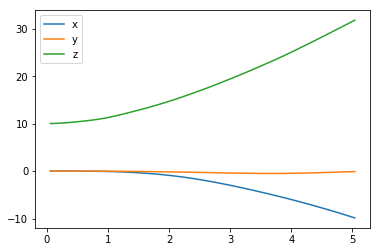

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

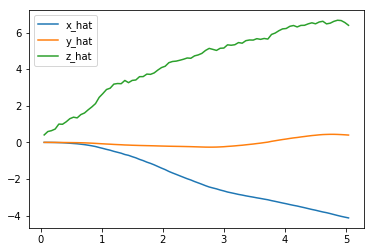

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

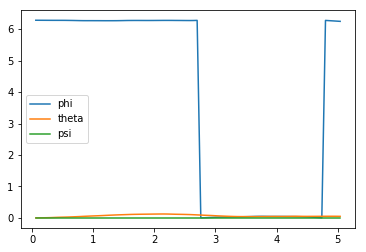

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

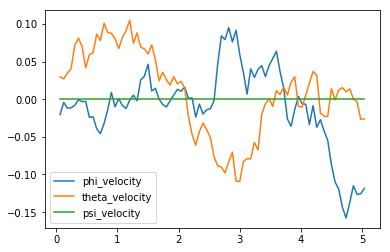

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

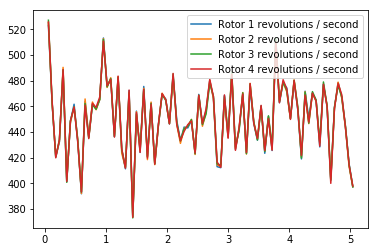

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print (type(task.sim.pose), np.shape(task.sim.pose))
print(task.sim.v)
print(task.sim.angular_v)

[ -9.86823067  -0.09326316  31.7869839    6.24779231   0.05020238   0.        ]
<class 'numpy.ndarray'> (6,)
[-4.12587856  0.39939141  6.39365691]
[-0.11828885 -0.02616706  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
# import sys
# import pandas as pd
# from agents.policy_search import PolicySearch_Agent
# from task import Task

# num_episodes = 1000
# target_pos = np.array([0., 0., 10.])
# task = Task(target_pos=target_pos)
# agent = PolicySearch_Agent(task) 

# for i_episode in range(1, num_episodes+1):
#     state = agent.reset_episode() # start a new episode
#     while True:
#         action = agent.act(state) 
#         next_state, reward, done = task.step(action)
#         agent.step(reward, done)
#         state = next_state
#         if done:
#             print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
#                 i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
#             break
#     sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [15]:
## TODO: Train your agent here.

import sys
import pandas as pd
from agents.agent import DDPG as DDPG_Agent
from task import Task

num_episodes = 1000
init_pose = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 200.])
task = Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG_Agent(task) 
file_output = 'telemetry1.txt'

# Telemetry capture setup
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
telemetry_results = {x : [] for x in labels}
rewards_results = {'episode' : [], 'avg_reward' : []}

with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)

    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        total_reward = 0
        count = 0
        while True:
            action = agent.act(state)
            rotor_speeds = action
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done) #reward, done)
            state = next_state
            total_reward += reward
            count += 1
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds) 
            
            for ii in range(len(labels)):
                telemetry_results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)    
            if done:                
                avg_reward = total_reward / count
                rewards_results['episode'].append(i_episode)
                rewards_results['avg_reward'].append(avg_reward)
                if i_episode % 100==0:
                    print("\rEpisode = {:4d}, Avg Reward = {:7.3f}".format(i_episode, avg_reward))  # [debug]              
                break
        sys.stdout.flush()
    

Episode =  100, Avg Reward =   0.841
Episode =  200, Avg Reward =   2.450
Episode =  300, Avg Reward =   2.406
Episode =  400, Avg Reward =   2.354
Episode =  500, Avg Reward =   2.463
Episode =  600, Avg Reward =   2.482
Episode =  700, Avg Reward =   2.657
Episode =  800, Avg Reward =   2.558
Episode =  900, Avg Reward =   2.463
Episode = 1000, Avg Reward =   2.441


In [49]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print('Init x, y, z pose : ', init_pose[:3])
print('Final x, y, z pose: ', task.sim.pose[:3])
print('Target pos: ', target_pos)
print('Final velocities: ', task.sim.v)
print('Final angular velocities: ', task.sim.angular_v) 

Init x, y, z pose :  [  0.   0.  10.]
Final x, y, z pose:  [ -19.84586168  -15.68192218  135.13701009]
Target pos:  [   0.    0.  200.]
Final velocities:  [-17.41531782  -9.04775514  22.53924246]
Final angular velocities:  [-0.16097144  0.22801554  0.        ]


In [17]:
# Out of bounds info
print ('Min x: ', min(telemetry_results['x']), 'Max x: ',  max(telemetry_results['x']), 'Avg x: ', np.mean(telemetry_results['x']))
print ('Min y: ', min(telemetry_results['y']), 'Max y: ',  max(telemetry_results['y']), 'Avg y: ', np.mean(telemetry_results['y']))
print ('Min z: ', min(telemetry_results['z']), 'Max z: ',  max(telemetry_results['z']), 'Avg z: ', np.mean(telemetry_results['z']))

Min x:  -80.7810422307 Max x:  150.0 Avg x:  -0.93383739173
Min y:  -150.0 Max y:  150.0 Avg y:  -1.02905696076
Min z:  0.0 Max z:  300.0 Avg z:  66.7479467694


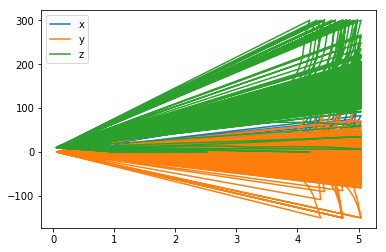

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(telemetry_results['time'], telemetry_results['x'], label='x')
plt.plot(telemetry_results['time'], telemetry_results['y'], label='y')
plt.plot(telemetry_results['time'], telemetry_results['z'], label='z')
plt.legend()
_ = plt.ylim()

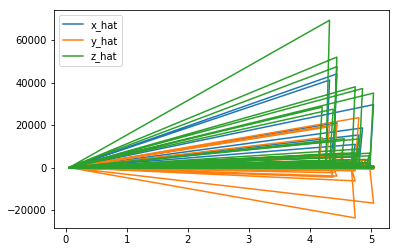

In [19]:
plt.plot(telemetry_results['time'], telemetry_results['x_velocity'], label='x_hat')
plt.plot(telemetry_results['time'], telemetry_results['y_velocity'], label='y_hat')
plt.plot(telemetry_results['time'], telemetry_results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

In [20]:
# plt.plot(telemetry_results['time'], telemetry_results['phi'], label='phi')
# plt.plot(telemetry_results['time'], telemetry_results['theta'], label='theta')
# plt.plot(telemetry_results['time'], telemetry_results['psi'], label='psi')
# plt.legend()
# _ = plt.ylim()

In [21]:
# plt.plot(telemetry_results['time'], telemetry_results['phi_velocity'], label='phi_velocity')
# plt.plot(telemetry_results['time'], telemetry_results['theta_velocity'], label='theta_velocity')
# plt.plot(telemetry_results['time'], telemetry_results['psi_velocity'], label='psi_velocity')
# plt.legend()
# _ = plt.ylim()

In [22]:
# plt.plot(telemetry_results['time'], telemetry_results['rotor_speed1'], label='Rotor 1 revolutions / second')
# plt.plot(telemetry_results['time'], telemetry_results['rotor_speed2'], label='Rotor 2 revolutions / second')
# plt.plot(telemetry_results['time'], telemetry_results['rotor_speed3'], label='Rotor 3 revolutions / second')
# plt.plot(telemetry_results['time'], telemetry_results['rotor_speed4'], label='Rotor 4 revolutions / second')
# plt.legend()
# _ = plt.ylim()

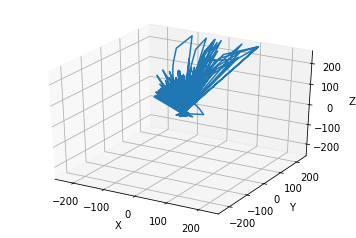

In [40]:
# Adapted from source: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X')
ax.set_xlim3d([-250.0, 250.0])

ax.set_ylim3d([-250.0, 250.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-250.0, 250.0])
ax.set_zlabel('Z')
ax.plot(telemetry_results['x'], telemetry_results['y'], telemetry_results['z'])

plt.show()

<IPython.core.display.Javascript object>


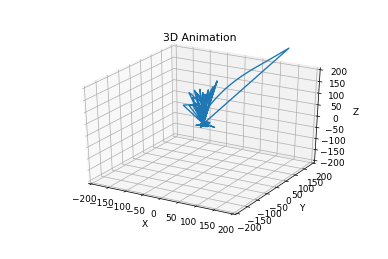

In [43]:
# Adapted from (source): https://matplotlib.org/gallery/animation/random_walk.html#sphx-glr-gallery-animation-random-walk-py

%matplotlib notebook
import matplotlib.pyplot as plt1
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D


def update_lines(num, data_lines, lines):
    #print ("IN FUNCTION", num)
    for line, data in zip(lines, data_lines):
        #print ('Line: ', line, '\n data: ', data)
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        #print ("IN LOOP")
        line.set_3d_properties(data[2, :num])
    return lines


# Attaching 3D axis to the figure
fig = plt1.figure()
ax1 = fig.add_subplot(111, projection='3d')

data = np.array([telemetry_results['x'], telemetry_results['y'], telemetry_results['z']])
               #[telemetry_results['x'], telemetry_results['y'], telemetry_results['z']])
#print (max(data[0]), min(data[0]))

data = np.reshape(data, (1, 3,-1))

lines = [ax1.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax1.set_xlim3d([-200.0, 200.0])
ax1.set_xlabel('X')

ax1.set_ylim3d([-200.0, 200.0])
ax1.set_ylabel('Y')

ax1.set_zlim3d([-200.0, 200.0])
ax1.set_zlabel('Z')

ax1.set_title('3D Animation')

#print (np.shape(data[0][0]))

# Creating the Animation object
line_ani = animation.FuncAnimation(
    fig, update_lines, 30000, fargs=(data, lines), interval=1)


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

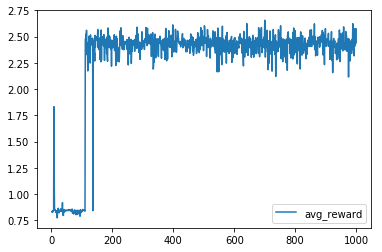

In [41]:
## TODO: Plot the rewards.
plt.plot(rewards_results['episode'], rewards_results['avg_reward'], label='avg_reward')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

- I tried various reward functions but settled on one which subtracts the target vector from the current pose, and takes the absolute value of this - the logic being that this result is a positive penalty reflecting how far off we are from the goal at any point.
- Additionally, I scaled these numbers to roughly b/w -1 and 1 to try to learn with greater stability. I multiplied this by -1 so a result of -1 (for this term) is farthest off from the target and a reward of 1 is on target.
- As my target goal was to get 200m vertically w/no x, y movement I added a "z_penalty" to further penalize for deviations in that dimension. I added this to the overall function but tried varying its effect by multiplying it by a constant.
- Another attempt to tinker w/this function seemed intuitive - square the error to try to further penalize large deviations compared to small ones - but didn't work in practice and so is not included.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

**Answer**:
- What learning algorithm(s) did you try? What worked best for you?
    - I used the Actor-Critic policy model. One significant difference from the defaults is that I expanded the state space to include not only x, y, z coordinates and Euler angles but also velocity information so the model was more feature rich.
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
    - I experimented w/most hyperparameters: I doubled the batch size to 128, experimented and abandoned a doubled experience buffer, I also lowered the gamma discount but w/poor results. I also doubled the OU noise exploration parameters sigma and theta - the model took an extremely long time to run and I returned these to previous values.
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.
    - I left the # of layers provided but doubled the number of nodes in all of the Actor hidden layers and in all of the Critic state and action pathway layers - which seemed to help. 


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

**Answer**:
- Was it an easy task to learn or hard?
    - Hard to get the reward function to produce increasing results.
- Was there a gradual learning curve, or an aha moment?
    - An aha moment: the copter generally took an episode or two to learn and then quickly soared to a much higher z-position. In the displayed results above it gradually increased in average rewards but then sort of oscillated at a similar average reward.
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)
    - (Graph above) The initial spurt of altitude was almost 3x the average reward at 100 episodes. The maximum average reward (at 700 episodes) was over 3x the 100 episode average reward. The final several average rewards were slightly below the maximum.


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

**Answer**:
- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
    - Getting the reward function somewhere near right was definitely the most difficult part - even an attempt that seemed logical (mentioned above) didn't improve things at all in practice. Also, I did 3-d plots and and animation to help me see how the quadcopter was doing and that took a little time to get that going. Getting used to the environment also was an adjustment.
- Did you find anything interesting in how the quadcopter or your agent behaved?
    - Yes, the vertical leap clearly caused by the z-penalty showed that tweaking the reward function is key. If I were to work further on this model, I would try alternatives to see if I could improve that function. Additionally, I would try another policy model - such as described in the content.
